In [4]:
from datetime import date

In [5]:
date.today().strftime("%d-%m-%Y")

'19-01-2025'

In [6]:
date.today()

datetime.date(2025, 1, 19)

In [7]:
from tools.input_preprocessing import Preprocessor

ModuleNotFoundError: No module named 'tools'

In [5]:
preprocessor = Preprocessor()
preprocessor.preprocess("bougth football for 50 yesterday", "987h78")

'UserId: 987h78\nAction: CREATE\nAmount: 50.00\nCategory: Leisure\nDate: 13-01-2025\nNotes: football expense of 50 from yesterday (13-01-2025)'

<graph.graph_chain.GraphChain object at 0x00000257A1EB4B90> client=<groq.resources.chat.completions.Completions object at 0x00000257A074E510> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000257A21C8790> model_name='llama-3.3-70b-specdec' model_kwargs={} groq_api_key=SecretStr('**********') ['semantic_vector_search', 'sql_search', 'search_aggregator']


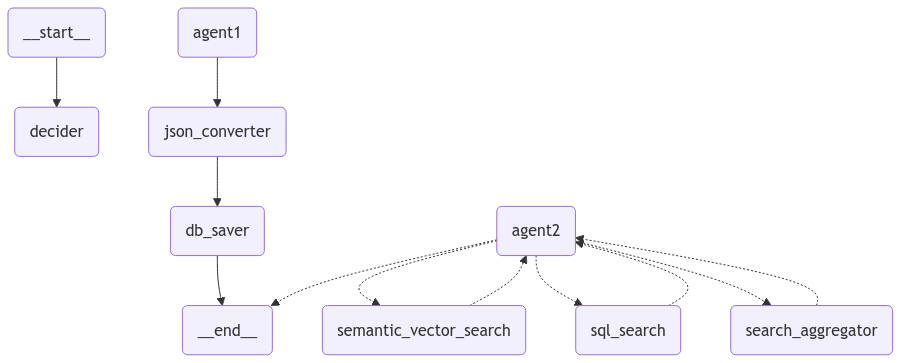

In [1]:
from graph.graph_chain import GraphChain

graph_chain = GraphChain()

graph_chain.build_graph()

graph_chain.graph

In [2]:
config = {"configurable": {"thread_id": "0"}, "recursion_limit":10}
preproccessed_value = ""


In [3]:
values = graph_chain.graph.stream({"messages": [("user","ate pizza for 30")]}, config, stream_mode="values")

for event in values:
    # print(event)
    preproccessed_value = list(event.values())[-1][-1].content
    print(preproccessed_value, end="\n\n")
    

ate pizza for 30

Successfully transferred to agent1

************* Call came to process_messages **********
ExpenseId: 379eaaa0-9d8d-4409-8696-01323de63180
UserId: 27456
Action: CREATE
Amount: 30.00
Category: food
Date: 25-01-2025
Notes: pizza expense of 30 on 25-01-2025

{"expenseId": "379eaaa0-9d8d-4409-8696-01323de63180", "userId": 27456, "action": "CREATE", "amount": 30.0, "category": "food", "date": "25-01-2025", "description": "pizza expense of 30 on 25-01-2025"}

['379eaaa0-9d8d-4409-8696-01323de63180']
Successfully saved the documents to database.



In [4]:
values = graph_chain.graph.stream({"messages": [("user","what is my total expense")]}, config, stream_mode="values")


for event in values:
    preproccessed_value = list(event.values())[-1][-1].content
    print(preproccessed_value, end="\n\n")
    # print(event, end="\n\n")
    

what is my total expense

Successfully transferred to agent2

Call came to sql_search *********************** ate pizza for 30


c:\Jony\Projects\Ongoing\spendora-ai\.conda\Lib\site-packages\langsmith\client.py:256: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


************* Call came to sql search **********
You ate pizza for 30 on 25-01-2025.

Call came to sql_search *********************** ate pizza for 30


c:\Jony\Projects\Ongoing\spendora-ai\.conda\Lib\site-packages\langsmith\client.py:256: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


************* Call came to sql search **********


KeyboardInterrupt: 

In [4]:
values = graph_chain.graph.stream({"messages": [("user","what is called great wildo ome here")]}, config, stream_mode="values")


for event in values:
    preproccessed_value = list(event.values())[-1][-1].content
    print(preproccessed_value, end="\n\n")
    # print(event, end="\n\n")
    

what is called great wildo ome here

Successfully transferred to agent2

Successfully transferred to vector_search

************* Call came to semantic_vector_search ********** what is called great wildo ome here
Your total expense is $30



In [1]:
from agents.db_saver import DbSaver

In [3]:
saver = DbSaver()
dict_ = {"expenseId": "d28d8b5b-a1cd-44e0-af3d-0c426c2ae42d", "userId": 27456, "action": "DELETE", "amount": 40.0, "category": "food", "date": "16-01-2025", "description": "food expense of 30 for pizza on 15-01-2025"}

saver.save(dict_)

None
Successfully saved the document to vector database.


'Successfully saved the documents to database.'